# 서울시 지역별 생활쓰레기 배출량 예측 및 해결방안

## 1. 데이터 전처리

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
# 폰트설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [307]:
path1 = 'https://raw.githubusercontent.com/DX5-Study/Trash/master/house.csv'
path2 = 'https://raw.githubusercontent.com/DX5-Study/Trash/master/household.csv'
path3 = 'https://raw.githubusercontent.com/DX5-Study/Trash/master/recycle.csv'
path4 = 'https://raw.githubusercontent.com/DX5-Study/Trash/master/single_age.csv'
house = pd.read_csv(path1)
household = pd.read_csv(path2)
recycle = pd.read_csv(path3)
single = pd.read_csv(path4)

In [308]:
def del_first_row(df):
    df.rename(columns=df.iloc[0], inplace=True)
    df.drop(df.index[0], inplace=True)
    df.reset_index(drop=True, inplace=True)

In [309]:
def del_unname_col(path):
    df = pd.read_csv(path)
    list1 = list(df.columns)
    if 'Unnamed: 0' in list1:
        df.drop('Unnamed: 0', inplace=True, axis = 1)
    return df   

In [310]:
def del_cols(df, del_c):
    df.drop(del_c, axis=1, inplace =True)

**1) house 데이터 전처리**

In [311]:
house.head()

,자치구별(1),자치구별(2),연면적별(1),시점,합계,합계.1,합계.2,합계.3,합계.4
0,자치구별(1),자치구별(2),연면적별(1),시점,단독주택,아파트,연립주택,다세대주택,비거주용건물내
1,합계,종로구,계,2017,12920,14507,5451,11978,931
2,합계,종로구,계,2018,12699,14530,5428,12140,932
3,합계,종로구,계,2019,12421,15290,5459,12349,921
4,합계,종로구,계,2020,12259,15688,5460,12540,912


In [312]:
del_first_row(house)

In [313]:
print(house['자치구별(1)'].value_counts())
print(house['연면적별(1)'].value_counts())

합계    125
Name: 자치구별(1), dtype: int64
계    125
Name: 연면적별(1), dtype: int64


In [314]:

del_c = ['자치구별(1)', '연면적별(1)']
del_cols(house, del_c)
house.head()

,자치구별(2),시점,단독주택,아파트,연립주택,다세대주택,비거주용건물내
0,종로구,2017,12920,14507,5451,11978,931
1,종로구,2018,12699,14530,5428,12140,932
2,종로구,2019,12421,15290,5459,12349,921
3,종로구,2020,12259,15688,5460,12540,912
4,종로구,2021,11987,15775,5490,12725,908


**2) household. 데이터 전처리**

In [315]:
household.head()

,동별(1),동별(2),시점,계,계.1,계.2,계.3,계.4,계.5,계.6
0,동별(1),동별(2),시점,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상가구
1,합계,종로구,2017,23638,15697,11268,8636,2351,601,181
2,합계,종로구,2018,25326,15957,11241,8286,2228,573,162
3,합계,종로구,2019,24671,16208,11154,7828,2143,505,143
4,합계,종로구,2020,25983,16281,10882,7679,2027,440,122


In [316]:
del_first_row(household)
household.head()

,동별(1),동별(2),시점,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상가구
0,합계,종로구,2017,23638,15697,11268,8636,2351,601,181
1,합계,종로구,2018,25326,15957,11241,8286,2228,573,162
2,합계,종로구,2019,24671,16208,11154,7828,2143,505,143
3,합계,종로구,2020,25983,16281,10882,7679,2027,440,122
4,합계,종로구,2021,27308,16320,10690,7367,1826,381,92


In [317]:
household['동별(1)'].value_counts()

합계    125
Name: 동별(1), dtype: int64

In [318]:
del_cols(household, '동별(1)')
household.head()

,동별(2),시점,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상가구
0,종로구,2017,23638,15697,11268,8636,2351,601,181
1,종로구,2018,25326,15957,11241,8286,2228,573,162
2,종로구,2019,24671,16208,11154,7828,2143,505,143
3,종로구,2020,25983,16281,10882,7679,2027,440,122
4,종로구,2021,27308,16320,10690,7367,1826,381,92


In [319]:
household.head()

,동별(2),시점,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상가구
0,종로구,2017,23638,15697,11268,8636,2351,601,181
1,종로구,2018,25326,15957,11241,8286,2228,573,162
2,종로구,2019,24671,16208,11154,7828,2143,505,143
3,종로구,2020,25983,16281,10882,7679,2027,440,122
4,종로구,2021,27308,16320,10690,7367,1826,381,92


In [320]:
household.rename(columns = { "동별(2)":"자치구별(2)"}, inplace = True)

**3) recycle. 데이터 전처리**

In [321]:
recycle.head()

,구분별(1),구분별(2),시점,발생량,재활용,소각,매립,기타
0,계,처리비율 (%),2017,100.00,67.10,24.30,8.70,-
1,계,처리비율 (%),2018,100.00,68.00,22.80,9.10,-
2,계,처리비율 (%),2019,100.00,66.40,22.80,9.90,0.9
3,계,처리비율 (%),2020,100.00,66.20,23.70,9.80,0.3
4,계,종로구,2017,375.10,227.70,109.60,37.80,-


In [322]:
recycle['구분별(1)'].value_counts()

계    104
Name: 구분별(1), dtype: int64

In [323]:
del_cols(recycle, '구분별(1)')
recycle.head()

,구분별(2),시점,발생량,재활용,소각,매립,기타
0,처리비율 (%),2017,100.00,67.10,24.30,8.70,-
1,처리비율 (%),2018,100.00,68.00,22.80,9.10,-
2,처리비율 (%),2019,100.00,66.40,22.80,9.90,0.9
3,처리비율 (%),2020,100.00,66.20,23.70,9.80,0.3
4,종로구,2017,375.10,227.70,109.60,37.80,-


In [324]:
#recycle['기타'] = recycle['발생량'] - recycle['재활용'] -recycle['소각']-recycle['매립']
recycle.replace('-',0, inplace=True)

In [325]:
pd.options.display.float_format = '{:.2f}'.format

In [326]:
recycle

,구분별(2),시점,발생량,재활용,소각,매립,기타
0,처리비율 (%),2017,100.00,67.10,24.30,8.70,0
1,처리비율 (%),2018,100.00,68.00,22.80,9.10,0
2,처리비율 (%),2019,100.00,66.40,22.80,9.90,0.9
3,처리비율 (%),2020,100.00,66.20,23.70,9.80,0.3
4,종로구,2017,375.10,227.70,109.60,37.80,0
...,...,...,...,...,...,...,...
99,송파구,2020,727.50,541.00,97.00,88.30,1.2
100,강동구,2017,375.00,279.80,74.10,21.10,0
101,강동구,2018,370.10,268.50,61.30,40.30,0
102,강동구,2019,419.90,283.10,74.90,40.90,21.0


In [327]:
recycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분별(2)  104 non-null    object 
 1   시점      104 non-null    int64  
 2   발생량     104 non-null    float64
 3   재활용     104 non-null    float64
 4   소각      104 non-null    float64
 5   매립      104 non-null    float64
 6   기타      104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [328]:
recycle.rename(columns = { "구분별(2)":"자치구별(2)"}, inplace = True)

***4)single 데이터 전처리***

In [329]:
single.head()

,자치구별(1),자치구별(2),시점,성별(1),합계,합계.1,합계.2,합계.3,합계.4,합계.5,합계.6,합계.7,합계.8,합계.9,합계.10,합계.11,합계.12,합계.13,합계.14
0,자치구별(1),자치구별(2),시점,성별(1),20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
1,합계,종로구,2017,계,507,2992,3627,2552,1796,1518,1723,1540,1660,1471,1151,1065,998,608,430
2,합계,종로구,2018,계,798,3741,4007,2587,1880,1454,1734,1578,1683,1508,1113,1111,1014,674,444
3,합계,종로구,2019,계,507,3280,3903,2647,1872,1405,1704,1521,1718,1572,1201,1120,1047,704,470
4,합계,종로구,2020,계,398,3331,4111,2923,1981,1516,1743,1612,1744,1727,1337,1156,1108,749,547


In [330]:
del_first_row(single)
single.head()

,자치구별(1),자치구별(2),시점,성별(1),20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,합계,종로구,2017,계,507,2992,3627,2552,1796,1518,1723,1540,1660,1471,1151,1065,998,608,430
1,합계,종로구,2018,계,798,3741,4007,2587,1880,1454,1734,1578,1683,1508,1113,1111,1014,674,444
2,합계,종로구,2019,계,507,3280,3903,2647,1872,1405,1704,1521,1718,1572,1201,1120,1047,704,470
3,합계,종로구,2020,계,398,3331,4111,2923,1981,1516,1743,1612,1744,1727,1337,1156,1108,749,547
4,합계,종로구,2021,계,328,3211,4588,3205,2015,1690,1620,1783,1757,1864,1546,1160,1133,811,597


In [331]:
print(single['자치구별(1)'].value_counts())
print(single['성별(1)'].value_counts())

합계    125
Name: 자치구별(1), dtype: int64
계    125
Name: 성별(1), dtype: int64


In [332]:
del_c = ['자치구별(1)', '성별(1)']
del_cols(single, del_c)
single.head()

,자치구별(2),시점,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,종로구,2017,507,2992,3627,2552,1796,1518,1723,1540,1660,1471,1151,1065,998,608,430
1,종로구,2018,798,3741,4007,2587,1880,1454,1734,1578,1683,1508,1113,1111,1014,674,444
2,종로구,2019,507,3280,3903,2647,1872,1405,1704,1521,1718,1572,1201,1120,1047,704,470
3,종로구,2020,398,3331,4111,2923,1981,1516,1743,1612,1744,1727,1337,1156,1108,749,547
4,종로구,2021,328,3211,4588,3205,2015,1690,1620,1783,1757,1864,1546,1160,1133,811,597


## 2. 데이터 병합

In [333]:

#house.tail()
household.tail()
#recycle.tail()
#single.tail()

,자치구별(2),시점,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상가구
120,강동구,2017,41050,40892,37455,31756,7517,1561,449
121,강동구,2018,42126,41450,36503,30197,7084,1468,405
122,강동구,2019,45188,43297,36735,29461,6606,1333,356
123,강동구,2020,50316,47740,39449,31456,6659,1242,286
124,강동구,2021,56905,49902,40210,30829,6224,1118,2


In [334]:

#house.tail(0)
#household.tail()
recycle.tail()
#single.tail()

,자치구별(2),시점,발생량,재활용,소각,매립,기타
99,송파구,2020,727.50,541.00,97.00,88.30,1.2
100,강동구,2017,375.00,279.80,74.10,21.10,0
101,강동구,2018,370.10,268.50,61.30,40.30,0
102,강동구,2019,419.90,283.10,74.90,40.90,21.0
103,강동구,2020,368.00,248.30,73.60,45.60,0


***3) 데이터 병합***

In [335]:
data = pd.merge(house, household, how='left', on=['자치구별(2)', '시점'])
data.tail()

,자치구별(2),시점,단독주택,아파트,연립주택,다세대주택,비거주용건물내,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상가구
120,강동구,2017,10742,75263,3551,30251,1133,41050,40892,37455,31756,7517,1561,449
121,강동구,2018,10467,75473,3512,32149,1117,42126,41450,36503,30197,7084,1468,405
122,강동구,2019,10220,73505,3165,35001,1123,45188,43297,36735,29461,6606,1333,356
123,강동구,2020,9956,87159,3114,36562,1085,50316,47740,39449,31456,6659,1242,286
124,강동구,2021,9672,94531,3199,37790,10,56905,49902,40210,30829,6224,1118,2


In [336]:
data = pd.merge(data, single, how='left', on=['자치구별(2)', '시점'])
data.tail()

,자치구별(2),시점,단독주택,아파트,연립주택,다세대주택,비거주용건물내,1인가구,2인가구,3인가구,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
120,강동구,2017,10742,75263,3551,30251,1133,41050,40892,37455,...,3394,3556,3248,3920,3531,2693,2051,1688,1074,701
121,강동구,2018,10467,75473,3512,32149,1117,42126,41450,36503,...,3261,3576,3171,3934,3852,2773,2253,1765,1126,749
122,강동구,2019,10220,73505,3165,35001,1123,45188,43297,36735,...,3306,3631,3332,3886,4134,3042,2500,1876,1276,829
123,강동구,2020,9956,87159,3114,36562,1085,50316,47740,39449,...,3746,3783,3592,3885,4585,3663,2809,2019,1385,955
124,강동구,2021,9672,94531,3199,37790,10,56905,49902,40210,...,4158,3826,3889,4124,5100,4481,3162,2234,1582,10


In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(2)  125 non-null    object
 1   시점       125 non-null    object
 2   단독주택     125 non-null    object
 3   아파트      125 non-null    object
 4   연립주택     125 non-null    object
 5   다세대주택    125 non-null    object
 6   비거주용건물내  125 non-null    object
 7   1인가구     125 non-null    object
 8   2인가구     125 non-null    object
 9   3인가구     125 non-null    object
 10  4인가구     125 non-null    object
 11  5인가구     125 non-null    object
 12  6인가구     125 non-null    object
 13  7인이상가구   125 non-null    object
 14  20세미만    125 non-null    object
 15  20~24세   125 non-null    object
 16  25~29세   125 non-null    object
 17  30~34세   125 non-null    object
 18  35~39세   125 non-null    object
 19  40~44세   125 non-null    object
 20  45~49세   125 non-null    object
 21  50~54세   125 non-null    object
 22  55

In [338]:
data['시점'] = data['시점'].astype('int64')

In [339]:
data = pd.merge(data, recycle, how='left', on=['자치구별(2)', '시점'])
data.tail()

,자치구별(2),시점,단독주택,아파트,연립주택,다세대주택,비거주용건물내,1인가구,2인가구,3인가구,...,65~69세,70~74세,75~79세,80~84세,85세이상,발생량,재활용,소각,매립,기타
120,강동구,2017,10742,75263,3551,30251,1133,41050,40892,37455,...,2693,2051,1688,1074,701,375.00,279.80,74.10,21.10,0
121,강동구,2018,10467,75473,3512,32149,1117,42126,41450,36503,...,2773,2253,1765,1126,749,370.10,268.50,61.30,40.30,0
122,강동구,2019,10220,73505,3165,35001,1123,45188,43297,36735,...,3042,2500,1876,1276,829,419.90,283.10,74.90,40.90,21.0
123,강동구,2020,9956,87159,3114,36562,1085,50316,47740,39449,...,3663,2809,2019,1385,955,368.00,248.30,73.60,45.60,0
124,강동구,2021,9672,94531,3199,37790,10,56905,49902,40210,...,4481,3162,2234,1582,10,NaN,NaN,NaN,NaN,NaN


In [340]:
data.rename(columns ={'자치구별(2)': '자치구'}, inplace=True)

In [341]:
#data.replace('-','', inplace=True)

In [342]:
data.to_csv('final.csv')

In [343]:
path = 'final.csv'
data = del_unname_col(path)

In [344]:
data.isna().sum()

자치구         0
시점          0
단독주택        0
아파트         0
연립주택        0
다세대주택       0
비거주용건물내     0
1인가구        0
2인가구        0
3인가구        0
4인가구        0
5인가구        0
6인가구        0
7인이상가구      0
20세미만       0
20~24세      0
25~29세      0
30~34세      0
35~39세      0
40~44세      0
45~49세      0
50~54세      0
55~59세      0
60~64세      0
65~69세      0
70~74세      0
75~79세      0
80~84세      0
85세이상       0
발생량        25
재활용        25
소각         25
매립         25
기타         25
dtype: int64

In [345]:
df =data.interpolate()
#df.fillna(method= 'bfill', inplace=True)
df.isna().sum()

자치구        0
시점         0
단독주택       0
아파트        0
연립주택       0
다세대주택      0
비거주용건물내    0
1인가구       0
2인가구       0
3인가구       0
4인가구       0
5인가구       0
6인가구       0
7인이상가구     0
20세미만      0
20~24세     0
25~29세     0
30~34세     0
35~39세     0
40~44세     0
45~49세     0
50~54세     0
55~59세     0
60~64세     0
65~69세     0
70~74세     0
75~79세     0
80~84세     0
85세이상      0
발생량        0
재활용        0
소각         0
매립         0
기타         0
dtype: int64

In [346]:
data.columns

Index(['자치구', '시점', '단독주택', '아파트', '연립주택', '다세대주택', '비거주용건물내', '1인가구', '2인가구',
       '3인가구', '4인가구', '5인가구', '6인가구', '7인이상가구', '20세미만', '20~24세', '25~29세',
       '30~34세', '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세',
       '65~69세', '70~74세', '75~79세', '80~84세', '85세이상', '발생량', '재활용', '소각',
       '매립', '기타'],
      dtype='object')

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구      125 non-null    object 
 1   시점       125 non-null    int64  
 2   단독주택     125 non-null    int64  
 3   아파트      125 non-null    int64  
 4   연립주택     125 non-null    int64  
 5   다세대주택    125 non-null    int64  
 6   비거주용건물내  125 non-null    int64  
 7   1인가구     125 non-null    int64  
 8   2인가구     125 non-null    int64  
 9   3인가구     125 non-null    int64  
 10  4인가구     125 non-null    int64  
 11  5인가구     125 non-null    int64  
 12  6인가구     125 non-null    int64  
 13  7인이상가구   125 non-null    int64  
 14  20세미만    125 non-null    int64  
 15  20~24세   125 non-null    int64  
 16  25~29세   125 non-null    int64  
 17  30~34세   125 non-null    int64  
 18  35~39세   125 non-null    int64  
 19  40~44세   125 non-null    int64  
 20  45~49세   125 non-null    int64  
 21  50~54세   125 non

In [348]:
df.to_csv('final.csv')

In [349]:
path = 'final.csv'
data = del_unname_col(path)

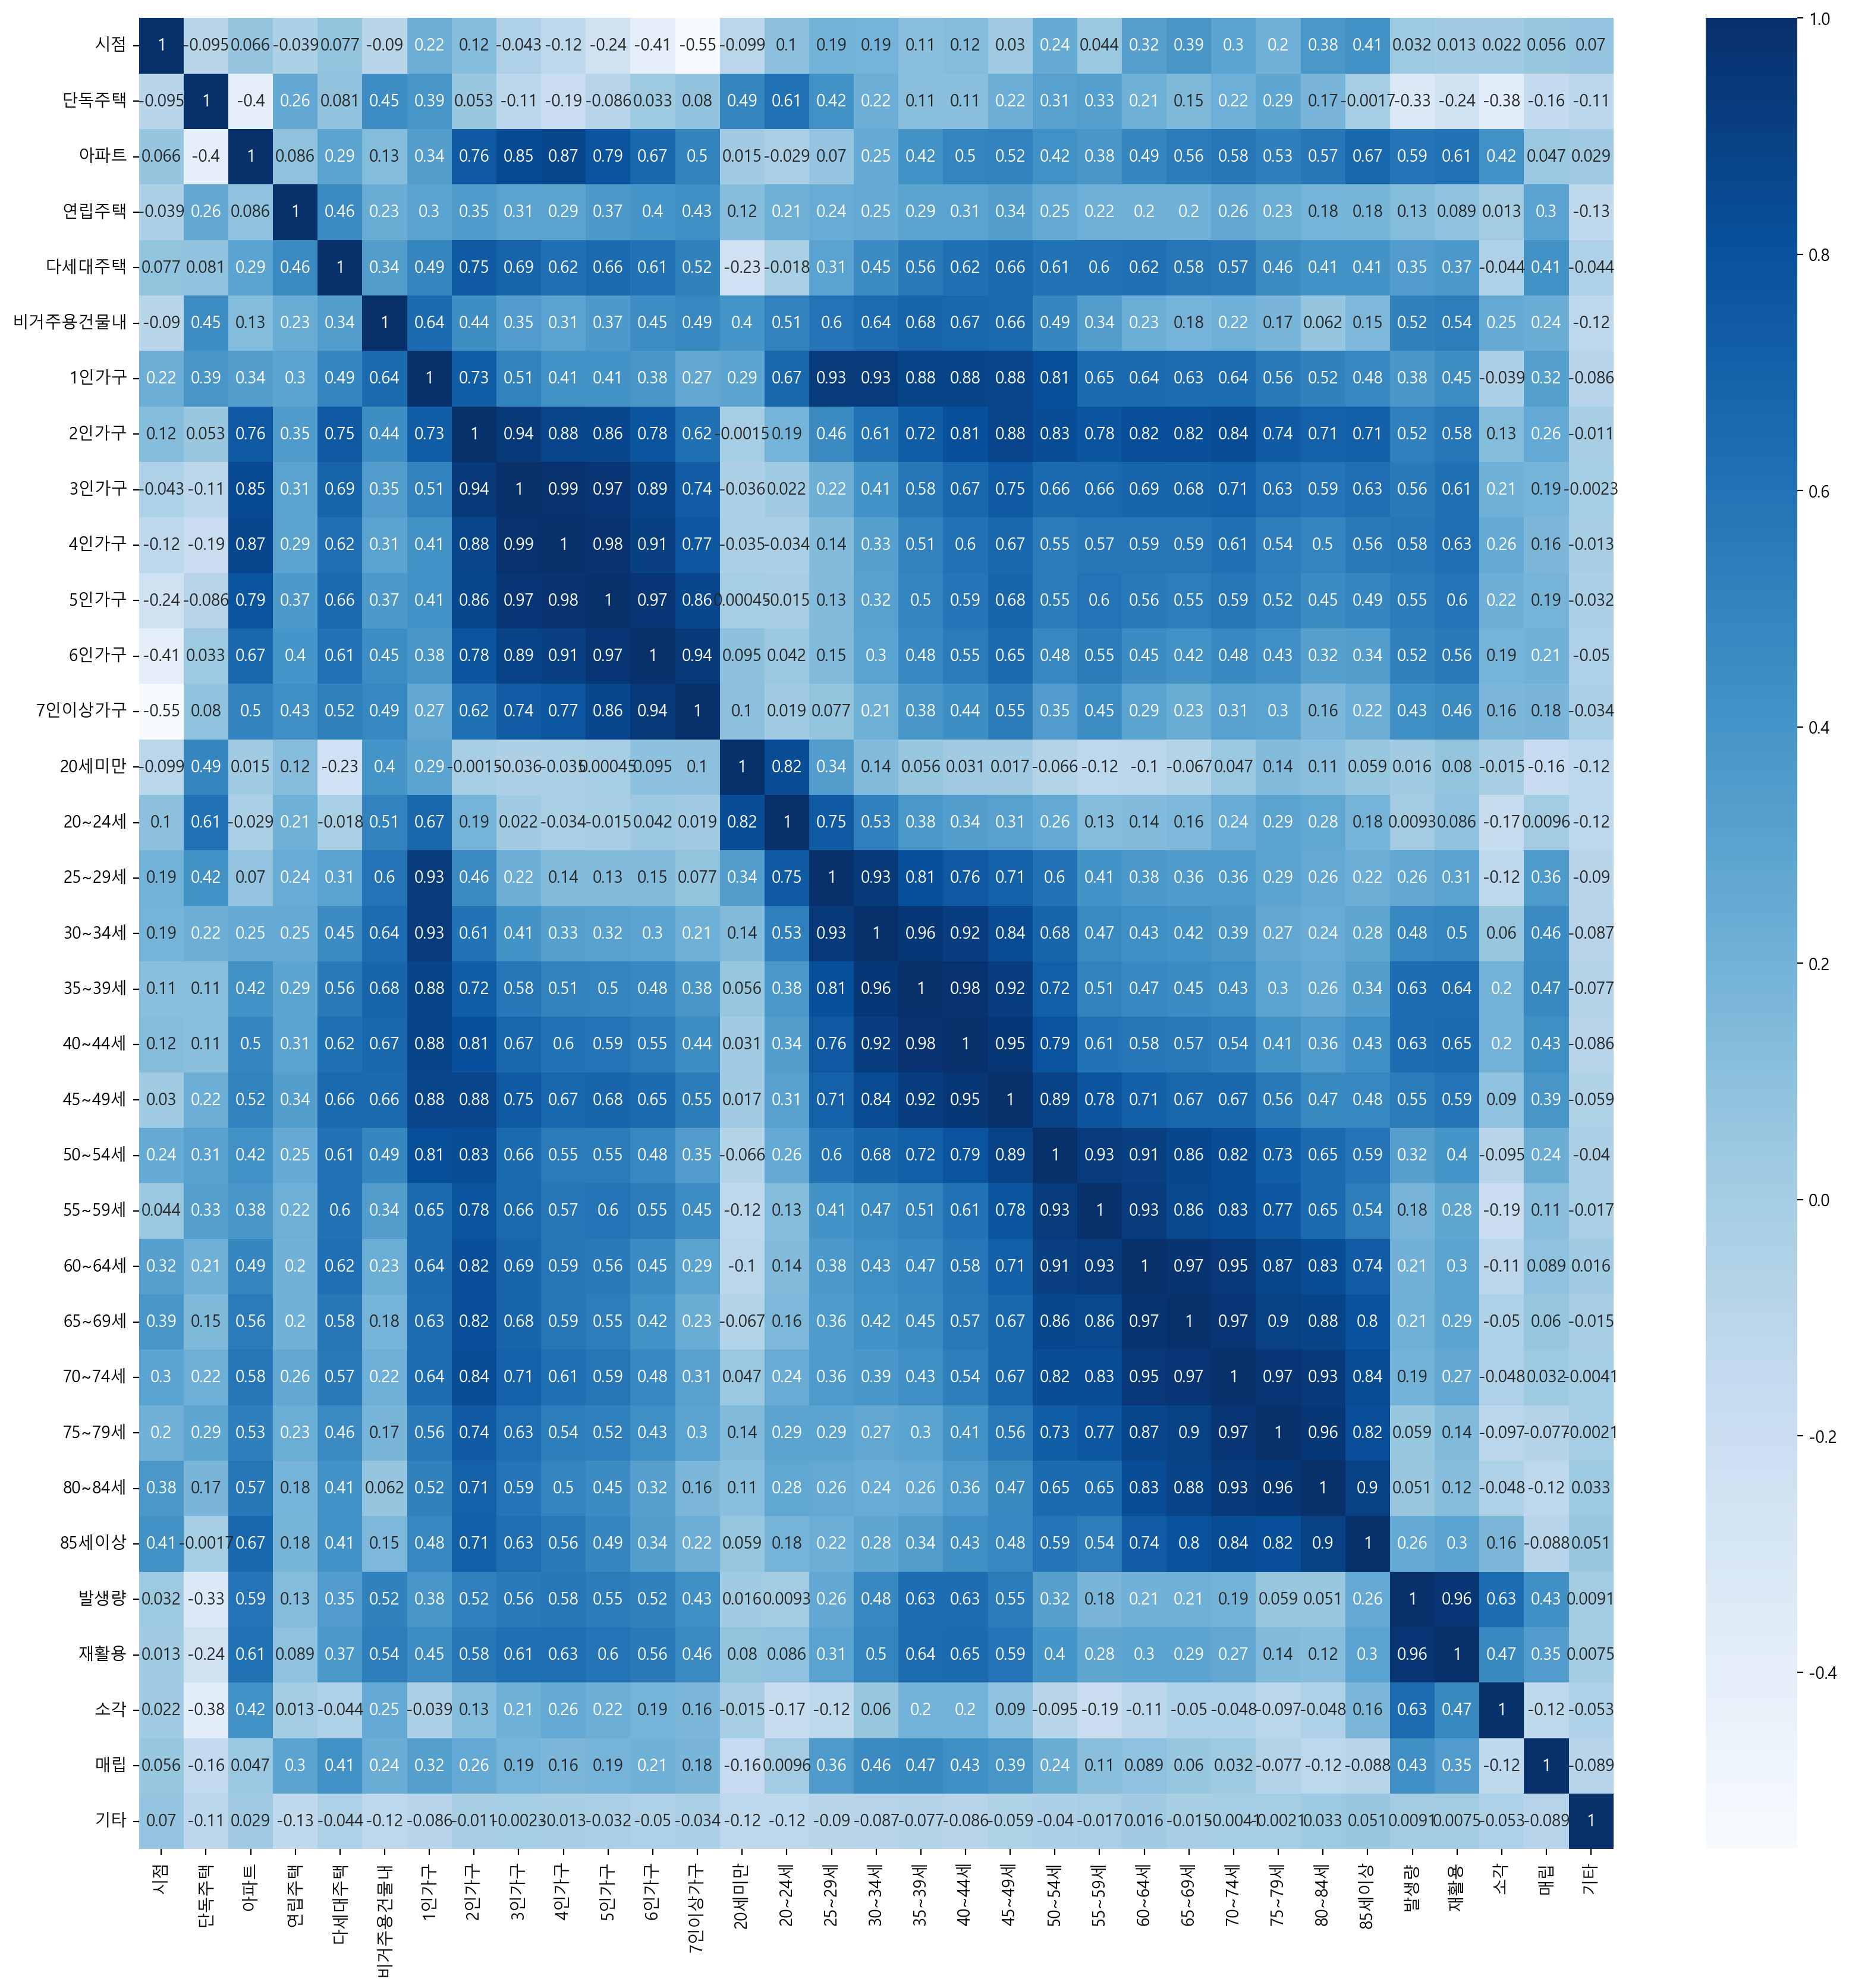

In [350]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap='Blues', annot= True)
plt.show()